In [29]:
text_unicode = "\u092A\u094D\u0930\u0923\u0935"
print(text_unicode)

प्रणव


In [30]:
!pip install mlxtend

In [31]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt

In [32]:
file_path = "Market_Basket_Optimisation.csv"
dataset = pd.read_csv(file_path, header=None)

In [33]:

# Data Preprocessing: Replace NaN values and convert to list of transactions
dataset.fillna('', inplace=True)
transactions = []
for i in range(0, len(dataset)):
    transaction = [str(item) for item in dataset.iloc[i] if item != '']
    transactions.append(transaction)



In [34]:
# Convert transactions into one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

df = pd.DataFrame(te_ary, columns=te.columns_)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:

# Define the function to get association rules with given support and confidence
def get_rules(min_support, min_confidence):
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    return rules

# Initialize the list to store results
results = []

# Try different values for support and confidence
support_values = [0.01, 0.02, 0.03, 0.04]
confidence_values = [0.2, 0.3, 0.4, 0.5]

for support in support_values:
    for confidence in confidence_values:
        rules = get_rules(support, confidence)
        results.append({
            'support': support,
            'confidence': confidence,
            'num_rules': len(rules)
        })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# You can then select the optimal combination based on the number of rules generated.


    support  confidence  num_rules
0      0.01         0.2        162
1      0.01         0.3         63
2      0.01         0.4         18
3      0.01         0.5          2
4      0.02         0.2         55
5      0.02         0.3         20
6      0.02         0.4          3
7      0.02         0.5          0
8      0.03         0.2         27
9      0.03         0.3          7
10     0.03         0.4          1
11     0.03         0.5          0
12     0.04         0.2          9
13     0.04         0.3          4
14     0.04         0.4          1
15     0.04         0.5          0


In [36]:
# Train Apriori algorithm on the dataset with a minimum support of 0.02
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)
...,...,...
98,0.020131,"(whole wheat rice, mineral water)"
99,0.022930,"(olive oil, spaghetti)"
100,0.025197,"(spaghetti, pancakes)"
101,0.021197,"(shrimp, spaghetti)"


In [37]:
# Generate association rules with a minimum confidence of 0.3
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
1,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,0.008142,1.151921,0.322617
2,(chicken),(mineral water),0.059992,0.238368,0.022797,0.380000,1.594172,0.008497,1.228438,0.396502
3,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
4,(cooking oil),(mineral water),0.051060,0.238368,0.020131,0.394256,1.653978,0.007960,1.257349,0.416672
5,(frozen smoothie),(mineral water),0.063325,0.238368,0.020264,0.320000,1.342461,0.005169,1.120047,0.272346
6,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270,0.402413
7,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
8,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
9,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1.315565,0.005756,1.109585,0.259747


In [38]:
# Determine the maximum length of itemsets
max_length = frequent_itemsets['itemsets'].apply(len).max()

# Filter the frequent itemsets that have the maximum length
last_table = frequent_itemsets[frequent_itemsets['itemsets'].apply(len) == max_length]

# Rounding the support values to 3 decimal places
last_table = last_table.round(3)

# Display the last table of frequent itemsets
print(last_table)



     support                            itemsets
53     0.029                     (eggs, burgers)
54     0.022             (french fries, burgers)
55     0.024            (mineral water, burgers)
56     0.021                (spaghetti, burgers)
57     0.027               (mineral water, cake)
58     0.023            (mineral water, chicken)
59     0.033                   (chocolate, eggs)
60     0.034           (chocolate, french fries)
61     0.023      (chocolate, frozen vegetables)
62     0.023              (green tea, chocolate)
63     0.023            (chocolate, ground beef)
64     0.032                   (milk, chocolate)
65     0.053          (chocolate, mineral water)
66     0.039              (chocolate, spaghetti)
67     0.020        (mineral water, cooking oil)
68     0.036                (french fries, eggs)
69     0.022           (frozen vegetables, eggs)
70     0.025                   (green tea, eggs)
71     0.031                        (milk, eggs)
72     0.051        

In [39]:
# Display the generated rules with values rounded to 2 decimal points
rounded_rules = rules.round(2)  # Round all numeric columns to 2 decimal points
print(rounded_rules.head(20).to_string(index=True))

            antecedents      consequents  antecedent support  consequent support  support  confidence  lift  leverage  conviction  zhangs_metric
0             (burgers)           (eggs)                0.09                0.18     0.03        0.33  1.84      0.01        1.22           0.50
1                (cake)  (mineral water)                0.08                0.24     0.03        0.34  1.42      0.01        1.15           0.32
2             (chicken)  (mineral water)                0.06                0.24     0.02        0.38  1.59      0.01        1.23           0.40
3           (chocolate)  (mineral water)                0.16                0.24     0.05        0.32  1.35      0.01        1.12           0.31
4         (cooking oil)  (mineral water)                0.05                0.24     0.02        0.39  1.65      0.01        1.26           0.42
5     (frozen smoothie)  (mineral water)                0.06                0.24     0.02        0.32  1.34      0.01        1.12 

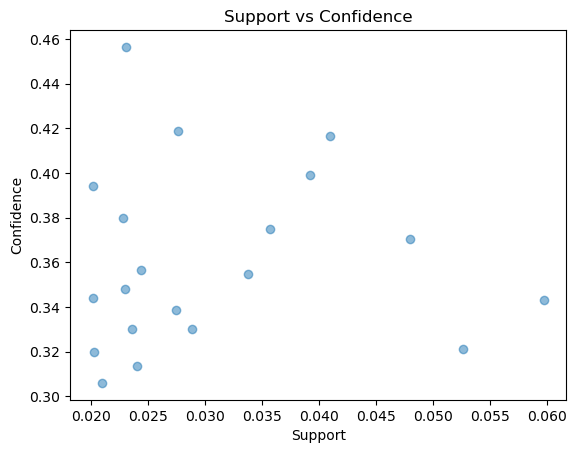

In [40]:
# Plotting support vs confidence for rules
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

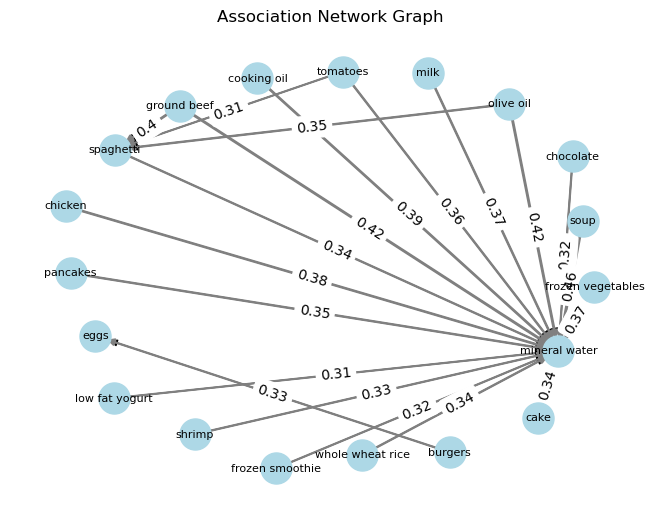

In [41]:


# Initialize a directed graph
G = nx.DiGraph()

# Add edges to the graph based on association rules
for _, rule in rules.iterrows():
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))
    G.add_edge(antecedents, consequents, weight=rule['confidence'])

# Define the layout for the graph
pos = nx.spring_layout(G, k=500)  # 'k' controls the distance between nodes

# Draw the nodes with labels
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, arrows=True)

# Draw edges with varying thickness based on confidence (rule strength)
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[rule['weight']*5 for (_, _, rule) in edges], edge_color='gray')

# Add labels to edges (showing the confidence of the rule)
edge_labels = {(ante, cons): f"{round(data['weight'], 2)}" for (ante, cons, data) in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.title("Association Network Graph")
plt.show()
